# Convolutional Neural Networks

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


## 1. Load CIFAR-10 Database

In [2]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 24s 0us/step


## 2. Visualize the First 24 Training Images¶

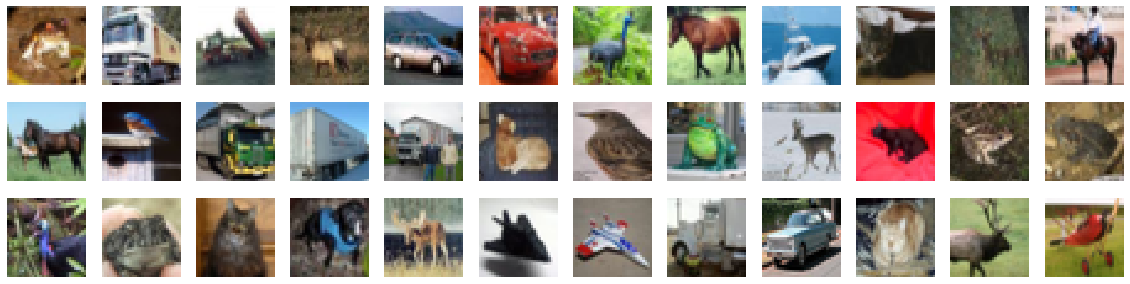

In [3]:
    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# visualize the first 36 images of the dataset, 3 by 12 images
fig = plt.figure(figsize=(20,5))
for i in range(36):
  ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]))

## 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [0]:
# rescale [0,255] --> [0,1]
# decimal value points
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## 4. Break Dataset into Training, Testing, and Validation Sets

In [5]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

('x_train shape:', (45000, 32, 32, 3))
(45000, 'train samples')
(10000, 'test samples')
(5000, 'validation samples')


## 5. Define the Model Architecture

Simple Keras CNN Model, Feel free to expand or imporve upon this model :)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



model = Sequential()

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 128)         0         
__________

## 6. Compile the Model

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

## 7. Train the Model

In [8]:
from keras.callbacks import ModelCheckpoint   

# Function to later visulaze the accuracy/performance of the model
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer,history], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 23s - loss: 1.5691 - acc: 0.4328 - val_loss: 1.4137 - val_acc: 0.4920

Epoch 00001: val_loss improved from inf to 1.41366, saving model to model.weights.best.hdf5
Epoch 2/100
 - 20s - loss: 1.2006 - acc: 0.5750 - val_loss: 1.0595 - val_acc: 0.6236

Epoch 00002: val_loss improved from 1.41366 to 1.05948, saving model to model.weights.best.hdf5
Epoch 3/100
 - 20s - loss: 1.0681 - acc: 0.6259 - val_loss: 1.1591 - val_acc: 0.5948

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 21s - loss: 0.9918 - acc: 0.6580 - val_loss: 1.0666 - val_acc: 0.6300

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 21s - loss: 0.9577 - acc: 0.6726 - val_loss: 1.0267 - val_acc: 0.6762

Epoch 00005: val_loss improved from 1.05948 to 1.02670, saving model to model.weights.best.hdf5
Epoch 6/100
 - 22s - loss: 0.9409 - acc: 0.6793 - val_loss: 0.9235 - val_acc: 0.6924

Epoch 00006: val_loss improved from 1.02670 to 0.92352, saving model to mod


Epoch 00026: val_loss did not improve
Epoch 27/100
 - 25s - loss: 1.3038 - acc: 0.5758 - val_loss: 1.4927 - val_acc: 0.5680

Epoch 00027: val_loss did not improve
Epoch 28/100
 - 24s - loss: 1.3140 - acc: 0.5706 - val_loss: 1.8850 - val_acc: 0.6126

Epoch 00028: val_loss did not improve
Epoch 29/100
 - 25s - loss: 1.3336 - acc: 0.5663 - val_loss: 1.2105 - val_acc: 0.5818

Epoch 00029: val_loss did not improve
Epoch 30/100
 - 25s - loss: 1.3291 - acc: 0.5637 - val_loss: 4.2770 - val_acc: 0.4436

Epoch 00030: val_loss did not improve
Epoch 31/100
 - 25s - loss: 1.3501 - acc: 0.5582 - val_loss: 1.2405 - val_acc: 0.5576

Epoch 00031: val_loss did not improve
Epoch 32/100
 - 22s - loss: 1.3600 - acc: 0.5559 - val_loss: 1.6237 - val_acc: 0.5942

Epoch 00032: val_loss did not improve
Epoch 33/100
 - 20s - loss: 1.3908 - acc: 0.5451 - val_loss: 1.5705 - val_acc: 0.5810

Epoch 00033: val_loss did not improve
Epoch 34/100
 - 20s - loss: 1.4154 - acc: 0.5350 - val_loss: 1.2142 - val_acc: 0.5842



Epoch 00054: val_loss did not improve
Epoch 55/100
 - 20s - loss: 1.7604 - acc: 0.3968 - val_loss: 1.5659 - val_acc: 0.4458

Epoch 00055: val_loss did not improve
Epoch 56/100
 - 20s - loss: 1.7595 - acc: 0.3942 - val_loss: 1.6406 - val_acc: 0.4646

Epoch 00056: val_loss did not improve
Epoch 57/100
 - 19s - loss: 1.7706 - acc: 0.3940 - val_loss: 1.6605 - val_acc: 0.4048

Epoch 00057: val_loss did not improve
Epoch 58/100
 - 19s - loss: 1.7799 - acc: 0.3900 - val_loss: 2.6515 - val_acc: 0.3510

Epoch 00058: val_loss did not improve
Epoch 59/100
 - 20s - loss: 1.8082 - acc: 0.3828 - val_loss: 1.9381 - val_acc: 0.4002

Epoch 00059: val_loss did not improve
Epoch 60/100
 - 21s - loss: 1.7928 - acc: 0.3748 - val_loss: 2.0035 - val_acc: 0.3888

Epoch 00060: val_loss did not improve
Epoch 61/100
 - 20s - loss: 1.8120 - acc: 0.3755 - val_loss: 1.9214 - val_acc: 0.3336

Epoch 00061: val_loss did not improve
Epoch 62/100
 - 19s - loss: 1.7884 - acc: 0.3763 - val_loss: 1.6521 - val_acc: 0.4436



Epoch 00082: val_loss did not improve
Epoch 83/100
 - 20s - loss: 1.9367 - acc: 0.2950 - val_loss: 1.6406 - val_acc: 0.3708

Epoch 00083: val_loss did not improve
Epoch 84/100
 - 20s - loss: 1.9352 - acc: 0.2966 - val_loss: 1.7135 - val_acc: 0.3392

Epoch 00084: val_loss did not improve
Epoch 85/100
 - 20s - loss: 1.9459 - acc: 0.2905 - val_loss: 2.3726 - val_acc: 0.1774

Epoch 00085: val_loss did not improve
Epoch 86/100
 - 20s - loss: 1.9510 - acc: 0.2858 - val_loss: 1.7923 - val_acc: 0.3178

Epoch 00086: val_loss did not improve
Epoch 87/100
 - 20s - loss: 1.9687 - acc: 0.2822 - val_loss: 1.7847 - val_acc: 0.3002

Epoch 00087: val_loss did not improve
Epoch 88/100
 - 20s - loss: 1.9778 - acc: 0.2771 - val_loss: 1.7434 - val_acc: 0.3582

Epoch 00088: val_loss did not improve
Epoch 89/100
 - 20s - loss: 1.9782 - acc: 0.2748 - val_loss: 1.8385 - val_acc: 0.3864

Epoch 00089: val_loss did not improve
Epoch 90/100
 - 20s - loss: 1.9605 - acc: 0.2767 - val_loss: 1.7398 - val_acc: 0.3266


## 8. Load the Model with the Best Validation Accuracy

In [0]:

# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## 9. Calculate Classification Accuracy on Test Set

In [10]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.6645)


## 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [0]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

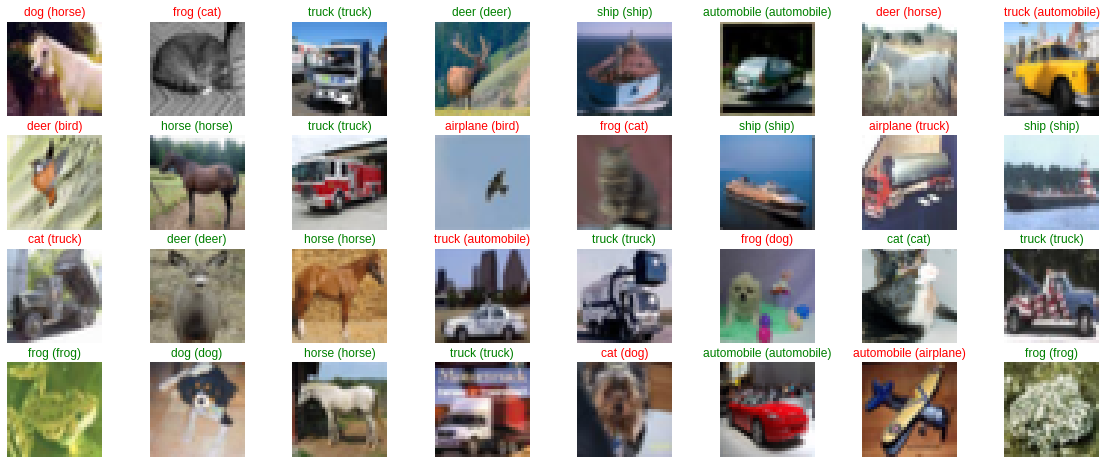

In [12]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

## 11. Visulalize the Accuracy of CNN Model

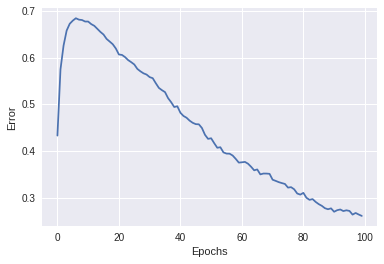

In [14]:
import numpy as np

Error = np.array(history.acc)

plt.plot(range(100), Error)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
